In [1]:
!python -V

Python 3.10.6


In [2]:
import pandas as pd

In [3]:
import pickle

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [9]:
import os
print(os.getcwd())

c:\Users\tunahan.kilic\OneDrive - ERIKS\Desktop


In [59]:
df_jan22 = pd.read_parquet(r'c:\Users\tunahan.kilic\OneDrive - ERIKS\Desktop\yellow_tripdata_2022-01.parquet')
df_feb22 = pd.read_parquet(r'c:\Users\tunahan.kilic\OneDrive - ERIKS\Desktop\yellow_tripdata_2022-02.parquet')

### Question-1

In [57]:
len(df_jan22.columns)

19

### Question-2

In [60]:
df_jan22['duration'] = (df_jan22.tpep_dropoff_datetime - df_jan22.tpep_pickup_datetime).apply(lambda td: td.total_seconds() / 60)

In [61]:
df_jan22['duration'].std().round(2)

46.45

### Question-3

In [68]:
(df_jan22[(df_jan22.duration >= 1) & (df_jan22.duration <= 60)].shape[0] / len(df_jan22))

0.9827547930522406

In [69]:
df_jan22 = df_jan22[(df_jan22.duration >= 1) & (df_jan22.duration <= 60)]

In [70]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

df_jan22[categorical] = df_jan22[categorical].astype(str)

In [71]:
train_dicts = df_jan22[categorical].to_dict(orient='records')
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

### Question-4

In [93]:
X_train.shape[1]

515

### Question-5

In [73]:
target = 'duration'
y_train = df_jan22[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

6.986190833327483

C:\Users\tunahan.kilic\AppData\Local\Temp\1\ipykernel_25776\792334868.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
C:\Users\tunahan.kilic\AppData\Local\Temp\1\ipykernel_25776\792334868.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')

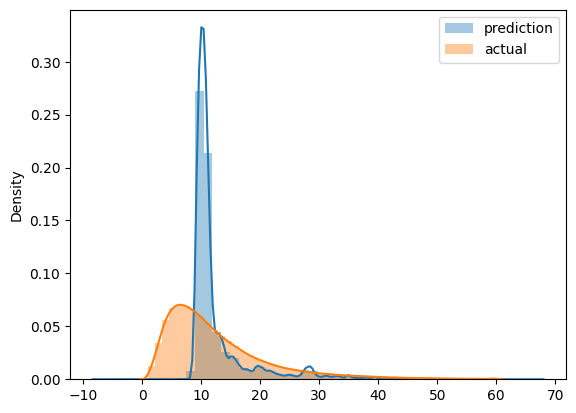

In [75]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()
plt.show()

In [79]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
        df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [86]:
df_train = read_dataframe(r'c:\Users\tunahan.kilic\OneDrive - ERIKS\Desktop\yellow_tripdata_2022-01.parquet')
df_val = read_dataframe(r'c:\Users\tunahan.kilic\OneDrive - ERIKS\Desktop\yellow_tripdata_2022-02.parquet')

In [87]:
len(df_train), len(df_val)

(2421440, 2918187)

In [88]:
categorical = ['PULocationID', 'DOLocationID']


dv = DictVectorizer()

train_dicts = df_train[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [89]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

### Question-6

In [90]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

7.786408816421503

In [16]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

In [91]:
lr = Lasso(0.01)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

8.116069832221214